# Transform Pandas DataFrame

# Table Of Contents
[1. Introduction](#1.Introduction)\
[2. Pivot_Tables](#2.Pivot_Tables)

      a.Apple Store Apps DataFrame
      b.Create DataFrame
      c.Create Pivot Table
    
[3. Pandas_Styling](#3.-Pandas_Styling)

     a.Styling applied to specific cell
     
[4. Defining_the_background_color](#4.-Defining_the_background_color)


      a.The background is styled with color gradients
      b.Viridis palette
      c.Color, Background in columns
      d.Color Bar
      e.percentile-based emoji representation



# 1. Introduction
In the subsequent part of this article, we will examine a technique for incorporating colors and styles into Pandas DataFrames. Our emphasis will be on implementing colors and emojis, using methods akin to the widely used conditional formatting found in pivot tables in spreadsheet applications. With this approach, our goal is to improve the visual presentation of our data, ensuring that the exploration and comprehension of information is informative and visually engaging.


Pandas Style is a module in the Pandas library that offers tools for producing HTML-styled versions of DataFrames. This feature permits users to personalize the visual display of DataFrames when viewing them. The primary function of Pandas Style is its capacity to emphasize, color, and format cells based on specific criteria, aiding in the visual detection of patterns and trends within datasets.

Moreover, Pandas Style is notable for its ability to aid in formatting DataFrames or series by creating visual representations using HTML and CSS. This feature streamlines the process of developing visually appealing and tailored data displays, improving the visualization experience and facilitating a more intuitive understanding of the data within the datasets.



# 2. Pivot Table
Pivot tables are a structured way of presenting summarized data from a table, arranging information based on one variable, and showing values related to another variable. 

In [1]:
import pandas as pd
import seaborn as sns

# Load the 'tips' dataset from seaborn
data = sns.load_dataset('tips')

# Create a pivot table using pd.pivot_table
data_pivot = pd.pivot_table(data,
                             index='smoker',
                             columns='day',
                             values='total_bill',
                             aggfunc='sum').reset_index()

# Display the pivoted DataFrame
print(data_pivot)



day smoker    Thur     Fri     Sat      Sun
0      Yes  326.24  252.20  893.62   458.28
1       No  770.09   73.68  884.78  1168.88


### a.Apple Store apps DataFrame
The **’🍎 Apple Store apps’** DataFrame will be utilized in this analysis to delve into the generation of pivot tables and the customization of table styles. This dataset offers comprehensive insights into Apple App Store applications, encompassing various details such as app names, size, price, and ratings. Our aim is to effectively dissect the information and apply styles that improve the presentation and understanding of the data.

### b.Create  DataFrame 
In the subsequent code snippet, a DataFrame will be generated by importing the CSV file.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Deactivate pandas warnings
warnings.filterwarnings('ignore')

# Print Python library versions
print("Python Libraries version:")
print('- ' * 20)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Matplotlib version: ", plt.matplotlib.__version__)


Python Libraries version:
- - - - - - - - - - - - - - - - - - - - 
Pandas version:  2.1.4
Numpy version:  1.23.5
Matplotlib version:  3.8.0


In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('AppleStore.csv')

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df.head(5))


   Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5  

### c.Creating Pivot Table

In [4]:
import pandas as pd
import math

# Assuming 'df' is already defined as a DataFrame from a CSV file

# Filter the data to keep only the top 15 genres by frequency
top_genre = df['prime_genre'].value_counts().nlargest(15).index.tolist()
tmp = df[df['prime_genre'].isin(top_genre)][['prime_genre', 'user_rating', 'price']]

# Round user_rating to the nearest integer and create a new column
tmp['user_rating'] = tmp['user_rating'].apply(lambda x: f'rating_{math.trunc(x)}')

# Create a pivot table
tmp_pivot = pd.pivot_table(tmp, 
                           columns='user_rating', 
                           index='prime_genre', 
                           values='price', 
                           aggfunc='mean', 
                           fill_value=0).reset_index().round(2)

# Rename columns (remove name from index column)
tmp_pivot.columns.name = ''

# Print the pivot table
print(tmp_pivot)


          prime_genre  rating_0  rating_1  rating_2  rating_3  rating_4  \
0                Book      0.49      0.00      5.32      1.66      3.04   
1           Education      3.42      1.79      1.95      2.32      5.20   
2       Entertainment      0.51      1.99      0.78      0.90      0.95   
3             Finance      0.30      0.00      0.00      0.73      0.53   
4               Games      0.85      0.84      1.21      1.71      1.52   
5    Health & Fitness      1.33      3.24      1.50      1.21      2.15   
6           Lifestyle      0.29      1.27      0.81      0.90      1.08   
7               Music      2.74      0.00      0.00      2.08      5.27   
8       Photo & Video      0.75      0.74      1.36      2.16      1.47   
9        Productivity      0.66      2.49      0.99      4.90      4.73   
10           Shopping      0.00      0.00      0.00      0.00      0.03   
11  Social Networking      0.12      0.40      0.66      0.33      0.41   
12             Sports    

# 3. Pandas Styling
In this section, we will delve into the `style` module within Pandas, which allows us to improve the visual representation of DataFrames. The `style` module offers a variety of choices for altering the appearance of the data, giving us the ability to personalize aspects such as:

- Cell Coloring: Applying various colors depending on cell values or conditions.
- Highlighting: Drawing attention to specific rows, columns, or values.
- Formatting: Modifying the format of the displayed values, including precision and alignment.
- Bar Charts: Displaying data using horizontal or vertical bar charts within 


In this segment, we will implement styles to the headings and the table. As a result, we will utilize background colors to emphasize the headers and the remaining content of the table.cells.

In [5]:
import pandas as pd
import math

# Assuming 'tmp_pivot' DataFrame is already defined

# Define styles for column headers and index names
headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}
index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

# Apply styles to the DataFrame using pandas Styler
tmp_pivot_style = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
)

# Display the styled DataFrame
tmp_pivot_style


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### a.Style applied to a specific cell
The code snippet below demonstrates how to specify a custom background color for a specific cell within our DataFrame by utilizing pandas styling.

In [6]:
import pandas as pd
import math

# Assuming 'tmp_pivot' DataFrame is already defined

# Define styles for column headers and index names
headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}
index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

# Apply styles to the DataFrame using pandas Styler
tmp_pivot_style = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
    .set_properties(**{'background-color': '#FD636B', 'color': 'white'},
                    subset=pd.IndexSlice[tmp_pivot.index[4], 'rating_5'])
)

# Display the styled DataFrame
tmp_pivot_style


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


# 4.Defining the background color 
We will now emphasize the highest and lowest values within our DataFrame by setting unique background colors for these extreme points. This visual distinction will aid in a more efficient and intuitive dataset analysis. The following code excerpt illustrates the process of incorporating this stylistic feature.

In [7]:
import pandas as pd

# Assuming tmp_pivot is your DataFrame

# Select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]

# Get the max and min values from these columns
max_value = tmp_pivot[columns].max().max()
min_value = tmp_pivot[columns].min().min()

# Define styles
max_style = 'border: 4px solid #3BE8B0 !important;'
min_style = 'background-color: #FF66C4;'

# Assuming headers and index_style are defined somewhere
# Example:
# headers = {'selector': 'th', 'props': 'background-color: #FFD700; color: black;'}
# index_style = {'selector': 'tr:nth-child(even)', 'props': 'background-color: #f2f2f2;'}

# Apply styles
styled_df = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
    .applymap(lambda x: 'background-color: #FD636B; color: white;' if x == 4 else '', subset=pd.IndexSlice[:, 'rating_5'])
    .applymap(lambda x: max_style if x == max_value else '')
    .applymap(lambda x: min_style if x == min_value else '', subset=columns)
)

# To display the styled DataFrame in Jupyter Notebook
styled_df



,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### a. The background is styled with color gradients.
In the following segment, we will explore the idea of color schemes, which showcase a range of colors organized gradually. A color scheme, serving as a collection of colors, comprises unique names, with the most commonly used ones including **[‘viridis,’ ‘magma,’ ‘Greens,’ ‘Reds’]**.

The main goal of developing these color gradients is to improve the visual depiction of information. Every color in the spectrum holds particular subtleties, adding to a more refined data visualization encounter.

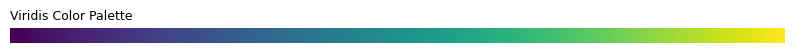

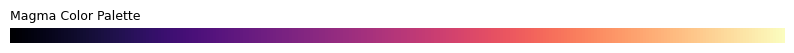

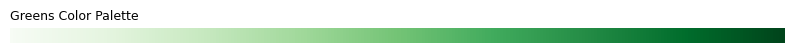

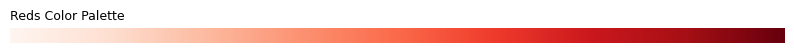

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the colormap
for cmap_item in ['viridis', 'magma', 'Greens', 'Reds']:
    cmap = plt.get_cmap(cmap_item)
    
    # Create a color gradient
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    
    # Display the color palette
    plt.figure(figsize=(10, 0.2))
    plt.imshow(gradient, aspect='auto', cmap=cmap)
    plt.axis('off')
    plt.title(f'{cmap_item.capitalize()} Color Palette', loc='left', fontsize=9)
    plt.show()


### b. Viridis palette
We will now use the Viridis color palette to add a color gradient to our pivot table. This will help you visualize the distribution of values, with lighter colors indicating larger values and darker shades representing smaller values. By using this approach, we can visually represent the magnitude of the data, making it easier to identify patterns and variations within the dataset.

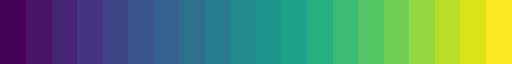

In [9]:
plt.get_cmap('viridis',lut=20)

In [10]:
import pandas as pd

# Assuming tmp_pivot is our DataFrame
# Select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]

# Define styles
headers = {'selector': 'th', 'props': 'background-color: #FFD700; color: black;'}
index_style = {'selector': 'tr:nth-child(even)', 'props': 'background-color: #f2f2f2;'}

# Apply styles and background gradient
styled_df = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .background_gradient(cmap='viridis', subset=columns)
)

# To display the styled DataFrame in Jupyter Notebook
styled_df


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### c. Style: Color, Background in columns
In the upcoming code snippet, we aim to improve the visual appeal of our pivot table by incorporating unique color backgrounds for individual columns. This method helps in effectively emphasizing and organizing data, facilitating a clearer interpretation of the table.

In [11]:
import pandas as pd

# Assuming tmp_pivot is our DataFrame

# Define styles
headers = {'selector': 'th', 'props': 'background-color: #FFD700; color: black;'}
index_style = {'selector': 'tr:nth-child(even)', 'props': 'background-color: #f2f2f2;'}

# Apply styles and set properties for specific columns
styled_df = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .set_properties(**{'background-color': '#FFCFC9', 'color': 'black'}, subset=['rating_0', 'rating_1'])
    .set_properties(**{'background-color': '#FFF1B0', 'color': 'black'}, subset=['rating_2', 'rating_3'])
    .set_properties(**{'background-color': '#BEEAE5', 'color': 'black'}, subset=['rating_4', 'rating_5'])
)

# To display the styled DataFrame in Jupyter Notebook
styled_df


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### Style: Color Bar

In this segment, we will incorporate the style, bar method to add a dynamic color bar to our DataFrame. This color bar will visually represent data values by assigning different colors to distinct data ranges.

In [12]:
import pandas as pd

# Assuming tmp_pivot is our DataFrame

# Select the columns that start with 'rating_'
columns = tmp_pivot.columns[tmp_pivot.columns.str.startswith('rating_')]

# Define styles
headers = {'selector': 'th', 'props': 'background-color: #FFD700; color: black;'}
index_style = {'selector': 'tr:nth-child(even)', 'props': 'background-color: #f2f2f2;'}

# Apply styles, set properties, and add bar charts
styled_df = (
    tmp_pivot
    .style
    .set_table_styles([headers, index_style])
    .set_properties(**{'background-color': '#ECE3FF', 'color': 'black'})
    .set_properties(**{'background-color': 'white', 'color': 'black'}, subset=columns)
    .bar(color='#FFCFC9', subset=['rating_0', 'rating_1'])
    .bar(color='#FFF1B0', subset=['rating_2', 'rating_3'])
    .bar(color='#BEEAE5', subset=['rating_4', 'rating_5'])
)

# To display the styled DataFrame in Jupyter Notebook
styled_df


,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.490000,0.000000,5.320000,1.660000,3.040000,1.920000
1,Education,3.420000,1.790000,1.950000,2.320000,5.200000,3.120000
2,Entertainment,0.510000,1.990000,0.780000,0.900000,0.950000,1.030000
3,Finance,0.300000,0.000000,0.000000,0.730000,0.530000,0.500000
4,Games,0.850000,0.840000,1.210000,1.710000,1.520000,1.290000
5,Health & Fitness,1.330000,3.240000,1.500000,1.210000,2.150000,1.830000
6,Lifestyle,0.290000,1.270000,0.810000,0.900000,1.080000,1.370000
7,Music,2.740000,0.000000,0.000000,2.080000,5.270000,13.160000
8,Photo & Video,0.750000,0.740000,1.360000,2.160000,1.470000,1.330000
9,Productivity,0.660000,2.490000,0.990000,4.900000,4.730000,2.610000


### d. Style: percentile based emoji representation

In [14]:
import pandas as pd

# Function to get percentile-based emoji labels
def get_percentiles(row_data, bins=3, emoji='circle'):
    emoji_labels = {
        'circle': {3: ['🔴', '🟡', '🟢'], 
                   4: ['🔴', '🟠', '🟡', '🟢']},
        'squad': {3: ['🟥', '🟨', '🟩'], 
                  4: ['🟥', '🟨', '🟧', '🟩']}
    }

    if emoji in ['max', 'min', 'min_max']:
        return create_series(row_data, emoji)
    elif emoji in emoji_labels and bins in emoji_labels[emoji]:
        labels = emoji_labels[emoji][bins]
        return pd.cut(row_data, bins=len(labels), labels=labels, include_lowest=True, ordered=False)
    else:
        return row_data

# Function to create series with emojis for max, min, or min-max
def create_series(row_data, emoji):
    if emoji == 'max':
        return pd.Series(['🟩' if item == row_data.max() else '⬜' for item in row_data])
    elif emoji == 'min':
        return pd.Series(['🟥' if item == row_data.min() else '⬜' for item in row_data])
    elif emoji == 'min_max':
        return pd.Series(['🟥' if item == row_data.min() else '🟩' if item == row_data.max() else '⬜' for item in row_data])

# Function to enhance DataFrame columns with emoji-based percentiles
def get_conditional_table_column(data, bins=3, emoji='circle'):
    tmp = data.copy()
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            row_data_emoji = get_percentiles(data[column], bins, emoji).astype(str)
            tmp[column] = data[column].astype(str) + ' ' + row_data_emoji
    return tmp

# Function to enhance DataFrame rows with emoji-based percentiles
def get_conditional_table_row(data, bins=3, emoji='circle'):
    response_values = []
    column_str = [item for item in data.columns if not pd.api.types.is_numeric_dtype(data[item])]
    columns_num = [item for item in data.columns if pd.api.types.is_numeric_dtype(data[item])]

    for row in range(data.shape[0]):
        row_data = data.loc[row, columns_num]
        percentil = get_percentiles(row_data, bins, emoji)
        row_data = row_data.apply(lambda x: '{:.2f}'.format(x))
        percentil_values = [str(row_data[item]) + ' ' + percentil[item] for item in range(len(percentil))]
        response_values.append(percentil_values)

    result_df = pd.DataFrame(response_values, columns=columns_num)
    result_df = pd.concat([data[column_str], result_df], axis=1)
    return result_df


In [15]:
# get conditional table by column with 3 bins 
get_conditional_table_row(data=tmp_pivot,emoji='min_max')

,prime_genre,rating_0,rating_1,rating_2,rating_3,rating_4,rating_5
0,Book,0.49 ⬜,0.00 🟥,5.32 🟩,1.66 ⬜,3.04 ⬜,1.92 ⬜
1,Education,3.42 ⬜,1.79 🟥,1.95 ⬜,2.32 ⬜,5.20 🟩,3.12 ⬜
2,Entertainment,0.51 🟥,1.99 🟩,0.78 ⬜,0.90 ⬜,0.95 ⬜,1.03 ⬜
3,Finance,0.30 ⬜,0.00 🟥,0.00 🟥,0.73 🟩,0.53 ⬜,0.50 ⬜
4,Games,0.85 ⬜,0.84 🟥,1.21 ⬜,1.71 🟩,1.52 ⬜,1.29 ⬜
5,Health & Fitness,1.33 ⬜,3.24 🟩,1.50 ⬜,1.21 🟥,2.15 ⬜,1.83 ⬜
6,Lifestyle,0.29 🟥,1.27 ⬜,0.81 ⬜,0.90 ⬜,1.08 ⬜,1.37 🟩
7,Music,2.74 ⬜,0.00 🟥,0.00 🟥,2.08 ⬜,5.27 ⬜,13.16 🟩
8,Photo & Video,0.75 ⬜,0.74 🟥,1.36 ⬜,2.16 🟩,1.47 ⬜,1.33 ⬜
9,Productivity,0.66 🟥,2.49 ⬜,0.99 ⬜,4.90 🟩,4.73 ⬜,2.61 ⬜
